# Exploring Data with Python

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

#Set Display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '${:,.2f}'.format

## Exploring tabular data with Pandas

In [2]:
data_orig = pd.read_csv(r"./data/player_past_history/merged_data.csv" , parse_dates = ["kickoff_time"]) 
#all_players = pd.read_csv(r"./data/all_players.csv" , parse_dates= ["news_added"]) 

#total_players = len(all_players)
#orig_df = data
#data = data[data.minutes != 0]

data = data_orig[["web_name" , "player_price" ,"position_id", "total_points" , "was_home" , "minutes"  , "opponent_team_name" , "opponent_strength" , "team_name"]]
data

,web_name,player_price,position_id,total_points,was_home,minutes,opponent_team_name,opponent_strength,team_name
0,Mustafi,55,2,0,False,0,NEW,3,ARS
1,McNeil,60,3,3,True,83,SOU,3,BUR
2,Lucas Moura,75,3,5,True,90,AVL,2,TOT
3,David Luiz,60,2,0,False,0,NEW,3,ARS
4,Lamela,60,3,1,True,87,AVL,2,TOT
...,...,...,...,...,...,...,...,...,...
22490,Fabianski,49,1,3,True,90,AVL,2,WHU
22491,Elliot,40,1,0,True,0,LIV,5,NEW
22492,Ki Sung-yueng,47,3,0,True,0,LIV,5,NEW
22493,Branthwaite,40,2,1,True,90,BOU,2,EVE


In [3]:
data_orig.head()

,fixture_id,opponent_team_id,total_points,was_home,kickoff_time,team_h_score,team_a_score,gameweek_id,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player_price,transfers_balance,selected,transfers_in,transfers_out,opponent_team_id.1,opponent_strength,opponent_team_name,player_id,web_name,position_id,player_price.1,team_id,team_name
0,10,13,0,False,2019-08-11 13:00:00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,$0.00,$0.00,$0.00,$0.00,55,0,33117,0,0,13,3,NEW,1,Mustafi,2,$5.10,1,ARS
1,3,16,3,True,2019-08-10 14:00:00,3,0,1,83,0,0,1,0,0,0,0,0,0,0,0,15,$15.80,$5.30,$0.00,$2.10,60,0,23782,0,0,16,3,SOU,97,McNeil,3,$6.00,5,BUR
2,6,2,5,True,2019-08-10 16:30:00,3,1,1,90,0,1,0,1,0,0,0,0,0,0,0,19,$24.40,$39.40,$32.00,$9.60,75,0,608669,0,0,2,2,AVL,345,Lucas Moura,3,$7.00,17,TOT
3,10,13,0,False,2019-08-11 13:00:00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,$0.00,$0.00,$0.00,$0.00,60,0,514779,0,0,13,3,NEW,106,David Luiz,2,$5.70,1,ARS
4,6,2,1,True,2019-08-10 16:30:00,3,1,1,87,0,0,0,1,0,0,0,1,0,0,0,15,$11.60,$38.30,$39.00,$8.90,60,0,37710,0,0,2,2,AVL,346,Lamela,3,$5.70,17,TOT


In [4]:
avg_points = data['total_points'].mean()
avg_minutes = data['minutes'].mean()

print('Average total points per gameweek: {:.2f}\nAverage minutes played: {:.2f}'.format(avg_points, avg_minutes))

Average total points per gameweek: 1.38
Average minutes played: 33.30


In [5]:
data[data.minutes > avg_minutes].total_points.mean()

3.313460642757336

In [6]:
data = data[data.minutes > 0]

avg_points = data['total_points'].mean()
avg_minutes = data['minutes'].mean()

print('Average total points per gameweek: {:.2f}\nAverage minutes played: {:.2f}'.format(avg_points, avg_minutes))


Average total points per gameweek: 2.92
Average minutes played: 70.58


In [7]:
data = data.sort_values('total_points' , ascending = False)
data

,web_name,player_price,position_id,total_points,was_home,minutes,opponent_team_name,opponent_strength,team_name
20156,Antonio,69,3,26,False,77,NOR,2,WHU
10077,Alexander-Arnold,72,2,24,False,90,LEI,3,LIV
17504,Martial,80,3,21,True,79,SHU,3,MUN
19941,Sterling,117,3,21,False,90,BHA,2,MCI
5543,Lundstram,47,2,21,True,90,BUR,3,SHU
...,...,...,...,...,...,...,...,...,...
13824,Zinchenko,52,2,-3,False,59,TOT,4,MCI
2671,Maitland-Niles,51,2,-3,True,40,AVL,2,ARS
20071,Söyüncü,50,2,-3,False,66,BOU,2,LEI
13153,David Luiz,57,2,-3,False,25,CHE,4,ARS


## Getting started with statistical analysis

Minimum:-6.00
Mean:2.92
Median:2.00
Mode:1.00
Maximum:26.00



Text(0, 0.5, 'Frequency')

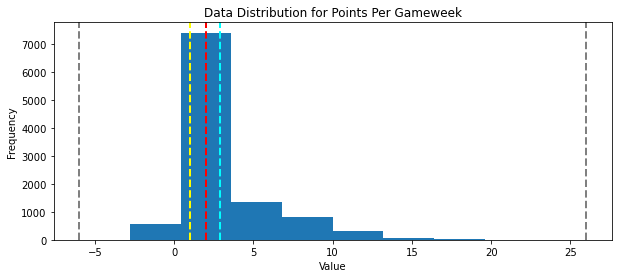

In [8]:
# Get the variable to examine
var_data = data['total_points']

# Get statistics
min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
med_val = var_data.median()
mod_val = var_data.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create the figure
fig = plt.figure(figsize = (10,4))

# Plot the histogram
plt.hist(var_data)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

#Add titles and labels
plt.title('Data Distribution for Points Per Gameweek')
plt.xlabel('Value')
plt.ylabel('Frequency')

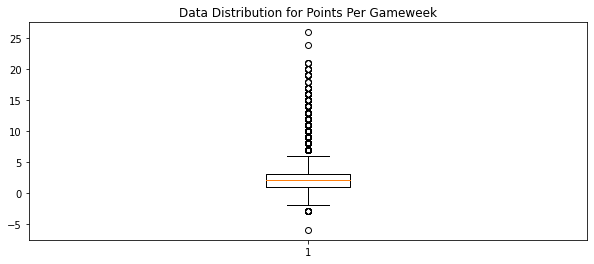

In [9]:
# Create a figure 
fig = plt.figure(figsize = (10,4))

# Plot a boxplot
plt.boxplot(var_data)

# Add titles and labels
plt.title('Data Distribution for Points Per Gameweek')

# Show the figure
fig.show()

Minimum:-6.00
Mean:2.92
Median:2.00
Mode:1.00
Maximum:26.00



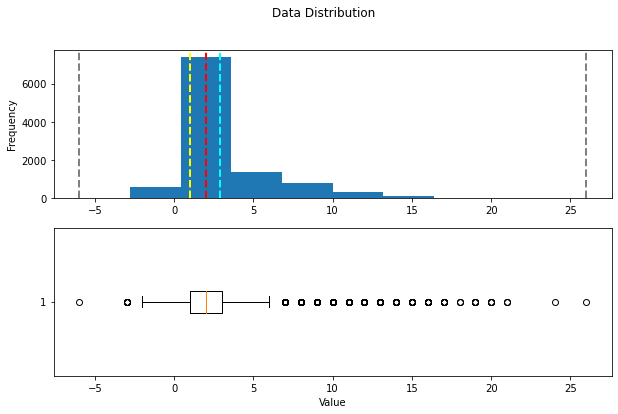

In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
input_variable = data['total_points']
# Call the function
show_distribution(input_variable)

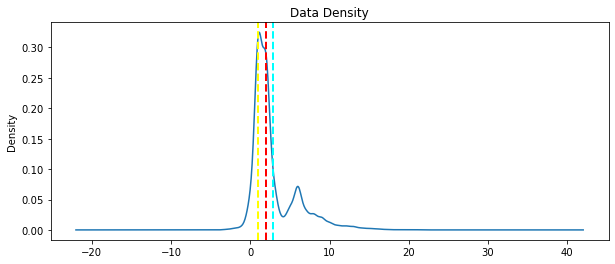

In [11]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
input_variable = data['total_points']
show_density(input_variable)

Minimum:-3.00
Mean:2.86
Median:2.00
Mode:1.00
Maximum:15.00



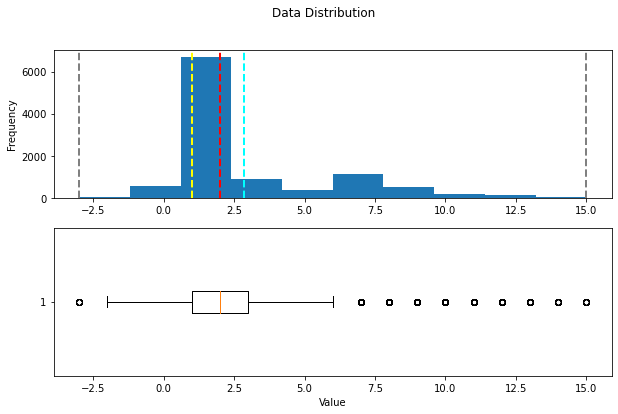

In [12]:
# Get the variable to examine
input_variable = data[(data.total_points >= -5) & (data.total_points <= 15)]['total_points']
# Call the function
show_distribution(input_variable)


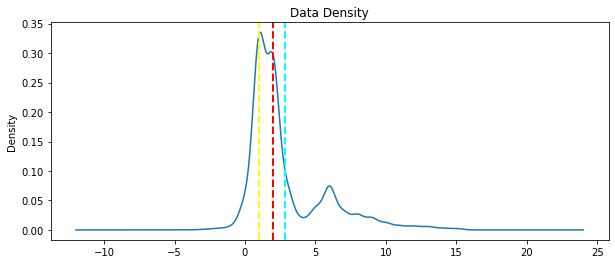

In [13]:
show_density(input_variable)

In [14]:
for col_name in ['total_points','minutes']:
    col = data[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


total_points:
 - Range: 32.00
 - Variance: 8.77
 - Std.Dev: 2.96

minutes:
 - Range: 89.00
 - Variance: 874.96
 - Std.Dev: 29.58


## Comparing Data

## Comparing numeric and categorical variables

<AxesSubplot:title={'center':'total_points'}, xlabel='was_home'>

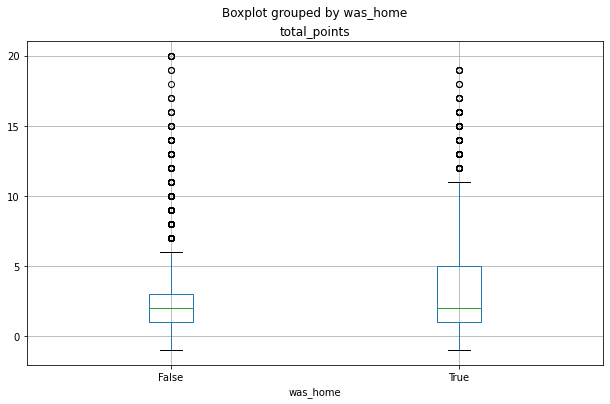

In [74]:
data_2 = data[(data.total_points >= -1) & (data.total_points <= 20)]
data_2.boxplot(column="total_points" , by='was_home' , figsize= (10,6))

### Comparing numeric values

In [75]:
data.head()

,web_name,player_price,position_id,total_points,was_home,minutes,opponent_team_name,opponent_strength,team_name
20156,Antonio,69,3,26,False,77,NOR,2,WHU
10077,Alexander-Arnold,72,2,24,False,90,LEI,3,LIV
17504,Martial,80,3,21,True,79,SHU,3,MUN
19941,Sterling,117,3,21,False,90,BHA,2,MCI
5543,Lundstram,47,2,21,True,90,BUR,3,SHU


<AxesSubplot:xlabel='team_name'>

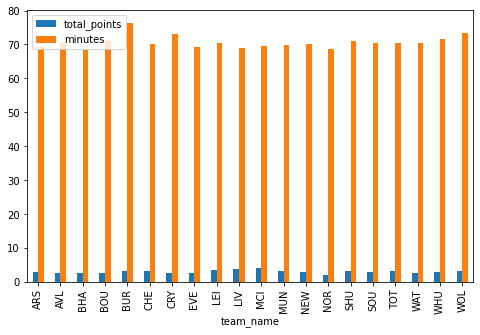

In [85]:
barplot_data = data.groupby(by="team_name").mean()
barplot_data.sort_values('total_points' , ascending = False)

barplot_data.plot( y = ["total_points" , "minutes"] , kind = "bar" , figsize = (8,5))

In [86]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
data_normalized = data[['team_name', 'total_points', 'minutes']].copy()
data_normalized = data.groupby(by="team_name").mean()
data_normalized.sort_values('total_points' , ascending = False , inplace = True)


In [87]:
# Normalize the numeric columns
data_normalized[['total_points','minutes']] = scaler.fit_transform(data_normalized[['total_points','minutes']])

<AxesSubplot:xlabel='team_name'>

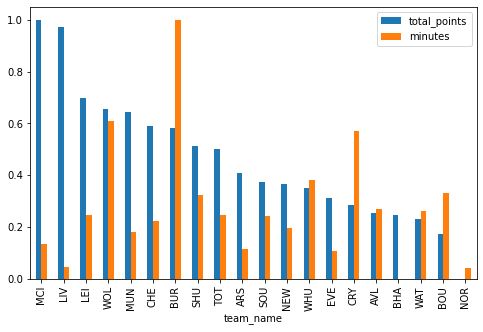

In [88]:
#Plot the normalized values
data_normalized.plot(y=['total_points','minutes'], kind='bar', figsize=(8,5))